<a href="https://colab.research.google.com/github/AntoinettedeLima/CM2604-Machine-Learning-course-work-/blob/main/20210522_ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#configures the Matplotlib backend to render the plots in the output cells of the notebook.
%matplotlib inline
# to get a higher-level interface for creating attractive/informative statistical graphics.
import seaborn as sn
from sklearn.model_selection import train_test_split #split dataset into training and testing sets
#algorithm that (used for classification tasks) uses a distance metric to determine the k-nearest neighbors of a data point and classifies it based on the class of the majority of its neighbors
from sklearn.neighbors import KNeighborsClassifier 
#perform cross-validation to evaluate the performance by training and testing it on different subsets of the data.
from sklearn.model_selection import cross_val_score, GridSearchCV
#to perform a grid search to find the best combination of hyperparameters that maximizes the performance.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve 
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve
#read the file
data = pd.read_csv('spambase.data') 
data

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
#changing the names of all columns.
data_new = data.set_axis(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
                'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
                'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email',
                'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
                'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
                'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
                'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu',
                'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
                'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total','Target'],axis=1)
data_new.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Target
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
#printing the number of emails and features.
print(data_new.shape)

(4600, 58)


In [5]:
#getting the email database attributes.
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

In [6]:
#PREPROCESSING THE DATA.

#getting all the null values.
data_new.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [7]:
#looking for data duplication.
duplicate_row = data_new[data_new.duplicated()]
#dropping duplicated rows.
data_new.drop_duplicates(inplace=True)

data_new.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Target
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


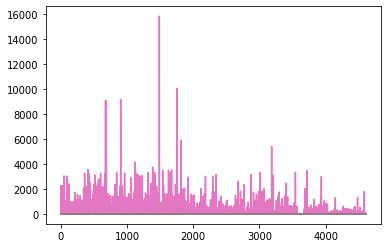

In [8]:
#SPLITTING THE DATASET AND CREATING THE TARGET.

# Splitting data into input features and target variable
X = data_new.drop('Target', axis=1)
y = data_new['Target']

plt.plot(X,label='Inputs emails')
plt.plot(y,label='Spam or not')
plt.show()

In [9]:
#splitting data as training = 70% and testing = 30%.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

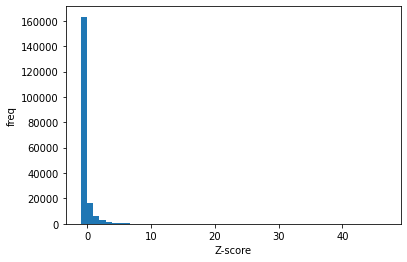

In [10]:
#calculating z-score to ensure that the training and testing sets are representative of the overall dataset.
z_scores = zscore(X_train)

#Flatterning Z-score to ensure that each data point is represented by a single value, which can then be used as an input to the algorithm.
z_scores_flat = z_scores.values.flatten()

plt.hist(z_scores_flat, bins=50)
plt.xlabel('Z-score')
plt.ylabel('freq')
plt.show()
#the graph should depict an output with no outliers.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fitting and transforming the training dataset.
X_train_scaled = scaler.fit_transform(X_train)

#using the scaler fitted on the training dataset to transform the test dataset.
X_test_scaled = scaler.transform(X_test)

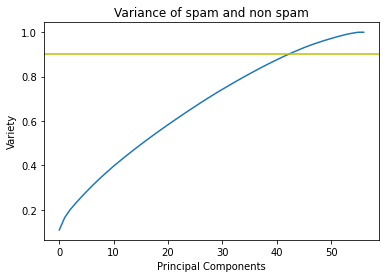

In [12]:
#PERFORMING PCA

from sklearn.decomposition import PCA
#standardizing data
df = StandardScaler().fit_transform(X)

pca1 = PCA()
principalComponents = pca1.fit_transform(df)
plt.figure()

plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variety') 
plt.title('Variance of spam and non spam')
plt.axhline(y=0.90, color='y', linestyle='-')
plt.show()

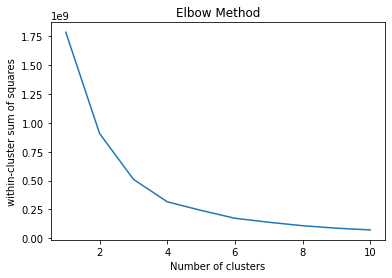

In [28]:
#CALCULATING THE NUMBER OF CLUSTERS TO PERFORM KNN.

#Calculate the within-cluster sum of squares (WCSS) for different number of clusters.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Plot the WCSS values against number of clusters.
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of squares')
plt.show()
#The point at which the change in WCSS starts to level off is considered as the optimal number of clusters.


In [29]:
#TO GET THE ACCURACY. 

from sklearn.model_selection import GridSearchCV

#Define the parameter grid.
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

#Instantiate KNN classifier.
knn = KNeighborsClassifier()

#Performing a grid search over the parameter grid.
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Printing the best hyperparameters and corresponding accuracy.
print('Best hyperparameters:', grid_search.best_params_)
print('Validation accuracy:', grid_search.best_score_)

#Making predictions on the test set using the best model.
best_knn = grid_search.best_estimator_
y_pred_test = best_knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Test accuracy:', accuracy_test)


Best hyperparameters: {'n_neighbors': 3}
Validation accuracy: 0.7938853885123963
Test accuracy: 0.7874109263657957


In [30]:
#TO GET MUCH HIGHER ACCURACY. 

#i have used a pipeline to standardize the data, perform feature selection using the ANOVA F-test, and train a KNN classifier. 
#It also performs a grid search over different values of k, different distance metrics, and different numbers of selected features.

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Defining the pipeline.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif)),
    ('knn', KNeighborsClassifier())
])

#Defining the parameter grid.
param_grid = {
    'feature_selection__k': [5, 10, 15],
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

#Performing a grid search over the parameter grid.
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Printing the best hyperparameters and corresponding accuracy.
print('Best hyperparameters:', grid_search.best_params_)
print('Validation accuracy:', grid_search.best_score_)

#Making predictions on the test set using the best model.
best_knn = grid_search.best_estimator_
y_pred_test = best_knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Test accuracy:', accuracy_test)


Best hyperparameters: {'feature_selection__k': 15, 'knn__metric': 'manhattan', 'knn__n_neighbors': 3}
Validation accuracy: 0.8939722487996085
Test accuracy: 0.9038004750593824


In [31]:
#EVALUATING THE MODEL.

from sklearn.metrics import classification_report

#Make predictions on the test set using the best model.
best_knn = grid_search.best_estimator_
y_pred_test = best_knn.predict(X_test)

#Evaluate the model's performance on the test set.
print(classification_report(y_test, y_pred_test))

#report that includes precision,recall,F1 score and support(number of instances) for each class and macro-averaged and weighted-averaged values for these metrics.


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       483
           1       0.93      0.84      0.88       359

    accuracy                           0.90       842
   macro avg       0.91      0.90      0.90       842
weighted avg       0.91      0.90      0.90       842



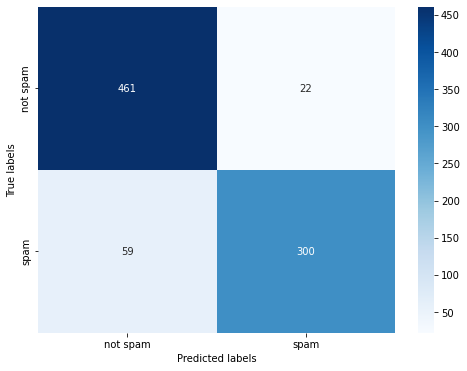

In [32]:
#heatmap of the confusion matrix with annotated values for each cell, where the rows correspond to the true labels and the columns correspond to the predicted labels.
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Make predictions on the test set using the best model.
best_knn = grid_search.best_estimator_
y_pred_test = best_knn.predict(X_test)

#Computing the confusion matrix.
cm = confusion_matrix(y_test, y_pred_test)

#Ploting the confusion matrix.
plt.figure(figsize=(8, 6))

#fmt argument is used to set the format for the annotated values in each cell.
#the format is set to "g" for a general number format.
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['not spam', 'spam'], yticklabels=['not spam', 'spam'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
 

In [33]:
#MODEL VALIDATION.

#The function splits the data into 5 folds, trains the model on 4 folds, and evaluates it on the remaining fold. 
#This repeats this process 5 times (with a different fold held out each time). 
#The function returns an array of accuracy scores for each fold, and the code calculates the average score.

#performing k-fold cross-validation.
from sklearn.model_selection import cross_val_score

#Instantiating KNN classifier with k=5.
knn = KNeighborsClassifier(n_neighbors=5)

#Performing 5-fold cross-validation.
cv_scores = cross_val_score(knn, X, y, cv=5)

#Printing the average cross-validation score.
print('Average cross-validation score:', cv_scores.mean())

Average cross-validation score: 0.7643010667653314


In [34]:
#DECISION TREE MODEL.

#Instantiating Decision Tree classifier.
dtc = DecisionTreeClassifier()

#Training the model on the training set.
dtc.fit(X_train, y_train)

#Making predictions on the test set.
y_pred_test = dtc.predict(X_test)

#Evaluating the model's accuracy on the test set.
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Test accuracy:', accuracy_test)

Test accuracy: 0.9097387173396675


In [35]:
#EVALUATING DECISION TREE MODEL.

from sklearn.metrics import classification_report

#Making predictions on the test set.
y_pred_test = dtc.predict(X_test)

#Printing classification report.
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       483
           1       0.92      0.87      0.89       359

    accuracy                           0.91       842
   macro avg       0.91      0.90      0.91       842
weighted avg       0.91      0.91      0.91       842



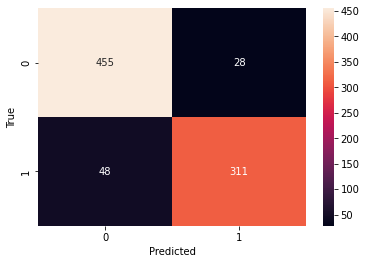

In [36]:
#heatmap of the confusion matrix.

#Make predictions on the test set.
y_pred_test = dtc.predict(X_test)

#Create confusion matrix.
cm = confusion_matrix(y_test, y_pred_test)

#Create heatmap of confusion matrix.
#fmt argument is used to set the format for the annotated values in each cell.
#the format is set to "g" for a general number format.
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
#printing the decision tree in text format, where each line represents a decision rule.

from sklearn.tree import export_text

#Training the model on the training set.
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

#Printing the decision tree as text.
tree_text = export_text(dtc, feature_names=list(X.columns))
print(tree_text)

|--- char_freq_$ <= 0.04
|   |--- word_freq_remove <= 0.05
|   |   |--- char_freq_! <= 0.51
|   |   |   |--- word_freq_free <= 0.23
|   |   |   |   |--- word_freq_000 <= 0.35
|   |   |   |   |   |--- capital_run_length_average <= 7.74
|   |   |   |   |   |   |--- word_freq_hp <= 0.02
|   |   |   |   |   |   |   |--- word_freq_business <= 0.09
|   |   |   |   |   |   |   |   |--- capital_run_length_longest <= 10.50
|   |   |   |   |   |   |   |   |   |--- word_freq_internet <= 0.08
|   |   |   |   |   |   |   |   |   |   |--- word_freq_money <= 11.12
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |   |--- word_freq_money >  11.12
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- word_freq_internet >  0.08
|   |   |   |   |   |   |   |   |   |   |--- word_freq_your <= 0.54
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |---

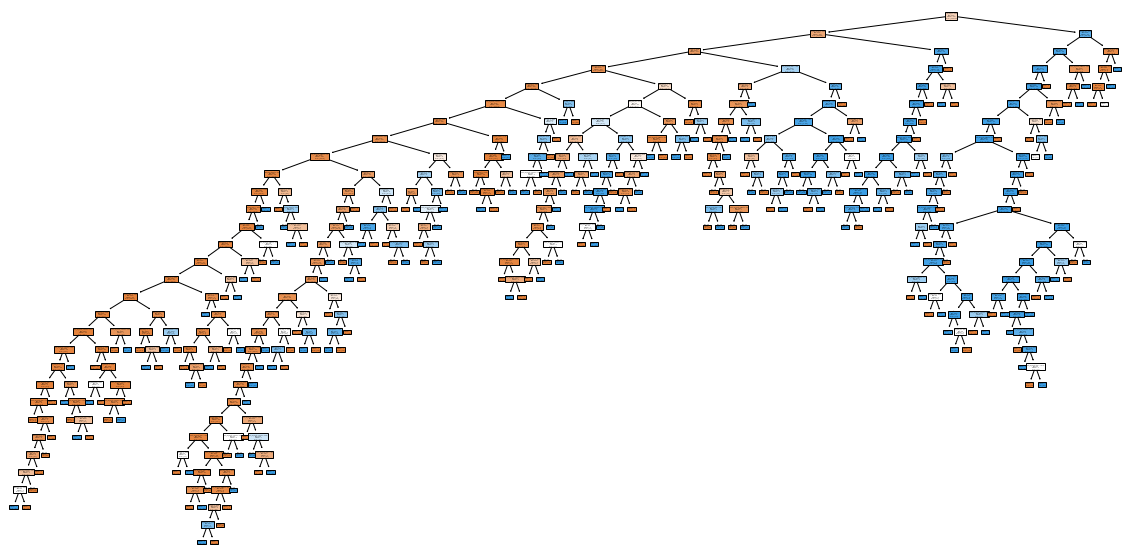

In [42]:
#plotting the decision tree.

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#a tuple of width and height is given to plot the tree.
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=list(X.columns))
plt.show()